In [3]:
import os
os.makedirs("../assets", exist_ok=True)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv("../data/netflix_cleaned.csv", parse_dates=['date_added'])

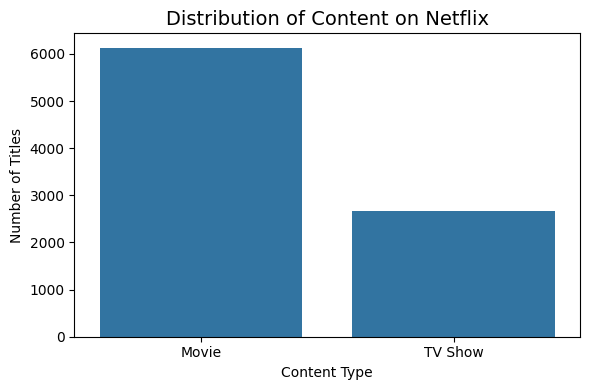

In [8]:
plt.figure(figsize=(6,4))

sns.countplot(data=df, x="type")

plt.title("Distribution of Content on Netflix", fontsize=14)
plt.xlabel("Content Type")
plt.ylabel("Number of Titles")

plt.tight_layout()
plt.savefig("../assets/content_type_distribution.png", dpi=300)
plt.show()


This bar chart shows the distribution of Movies vs TV Shows on Netflix.  
Movies clearly dominate the platform, which should be considered in downstream analysis.


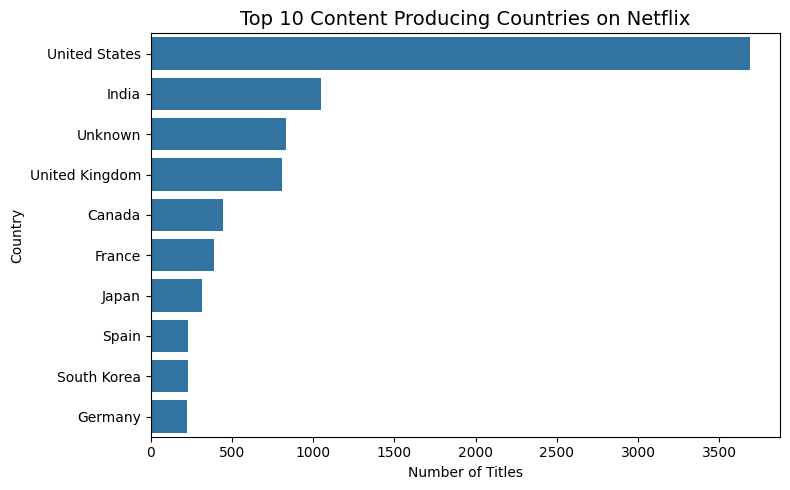

In [18]:
countries = df[['country']].copy()
countries['country'] = countries['country'].fillna('Unknown')
countries_exploded = countries.assign(country = countries['country'].str.split(',')).explode('country')
countries_exploded['country'] = countries_exploded['country'].str.strip()
top_countries = (
    countries_exploded["country"]
    .value_counts()
    .head(10)
)

plt.figure(figsize=(8,5))
sns.barplot(x=top_countries.values, y=top_countries.index)

plt.title("Top 10 Content Producing Countries on Netflix", fontsize=14)
plt.xlabel("Number of Titles")
plt.ylabel("Country")

plt.tight_layout()
plt.savefig("../assets/top_countries.png", dpi=300)
plt.show()


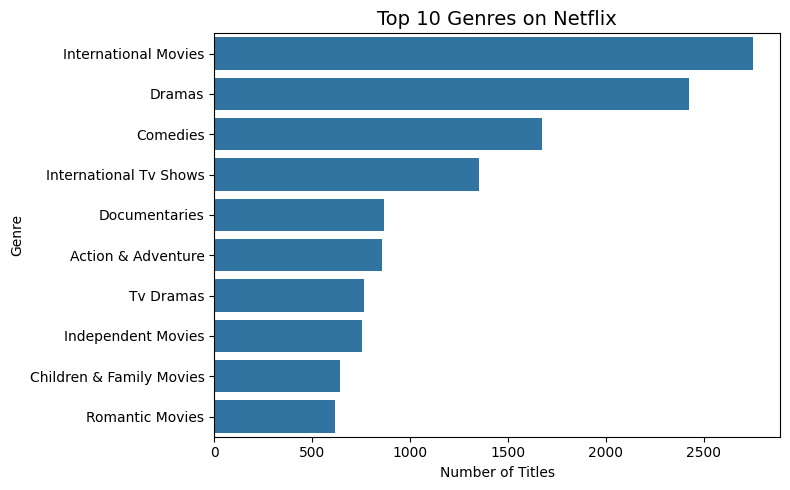

In [21]:
genres = df[['show_id','type','listed_in']].copy()
genres['listed_in'] = genres['listed_in'].fillna('Unknown')
genres_exploded = genres.assign(genre = genres['listed_in'].str.split(',')).explode('genre')
genres_exploded['genre'] = genres_exploded['genre'].str.strip()
top_genres = genres_exploded["genre"].value_counts().head(10)

plt.figure(figsize=(8,5))
sns.barplot(x=top_genres.values, y=top_genres.index)

plt.title("Top 10 Genres on Netflix", fontsize=14)
plt.xlabel("Number of Titles")
plt.ylabel("Genre")

plt.tight_layout()
plt.savefig("../assets/top_genres.png", dpi=300)
plt.show()


The United States leads Netflix content production by a large margin,
followed by India and the United Kingdom.


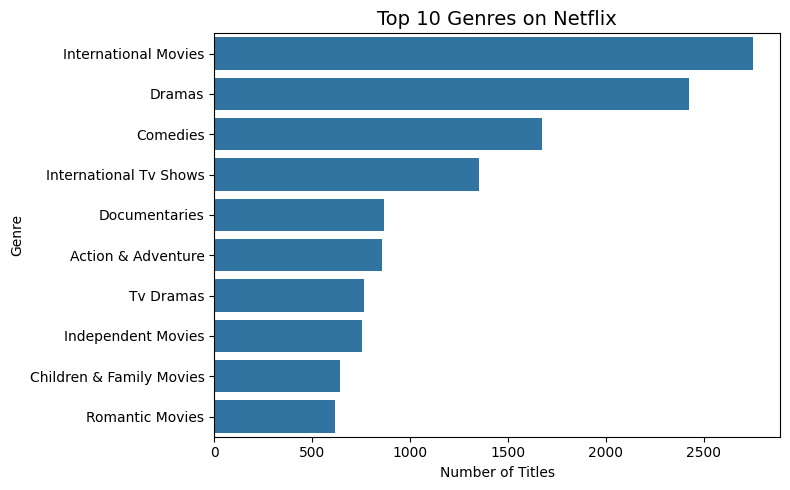

In [22]:
top_genres = genres_exploded["genre"].value_counts().head(10)

plt.figure(figsize=(8,5))
sns.barplot(x=top_genres.values, y=top_genres.index)

plt.title("Top 10 Genres on Netflix", fontsize=14)
plt.xlabel("Number of Titles")
plt.ylabel("Genre")

plt.tight_layout()
plt.savefig("../assets/top_genres.png", dpi=300)
plt.show()


Drama-related genres dominate Netflix’s catalog,
indicating a strong focus on story-driven content.


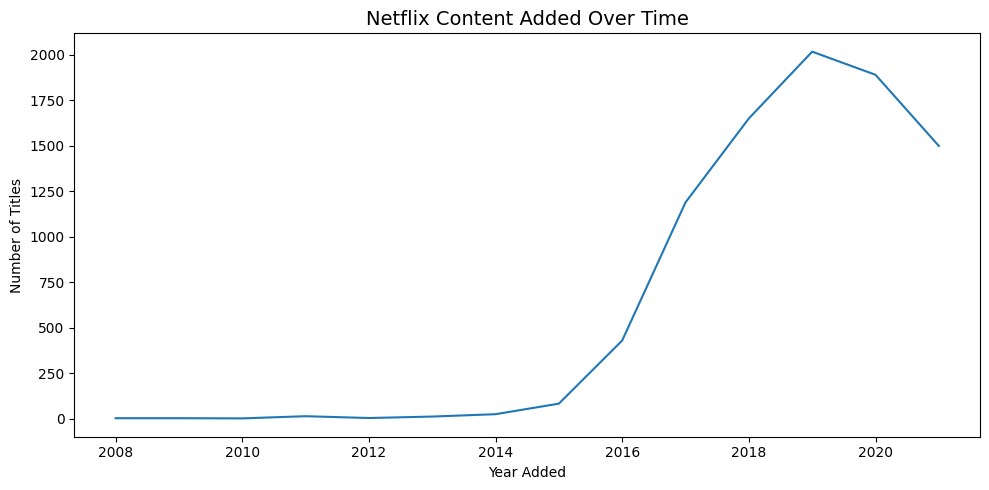

In [23]:
content_by_year = (
    df["year_added"]
    .value_counts()
    .sort_index()
)

plt.figure(figsize=(10,5))
plt.plot(content_by_year.index, content_by_year.values)

plt.title("Netflix Content Added Over Time", fontsize=14)
plt.xlabel("Year Added")
plt.ylabel("Number of Titles")

plt.tight_layout()
plt.savefig("../assets/content_over_time.png", dpi=300)
plt.show()


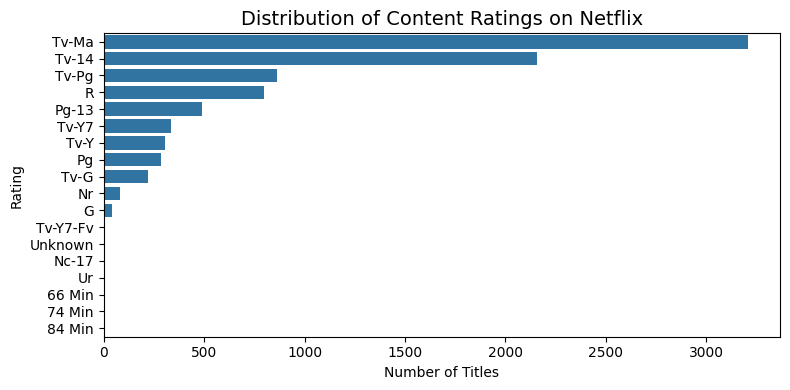

In [24]:
plt.figure(figsize=(8,4))

sns.countplot(
    data=df,
    y="rating",
    order=df["rating"].value_counts().index
)

plt.title("Distribution of Content Ratings on Netflix", fontsize=14)
plt.xlabel("Number of Titles")
plt.ylabel("Rating")

plt.tight_layout()
plt.savefig("../assets/ratings_distribution.png", dpi=300)
plt.show()


TV-MA is the most common rating, suggesting that Netflix content is
primarily targeted toward mature audiences.
